In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# importing data
df = pd.read_csv(r"C:\Users\deepa\Downloads\loan_train.csv")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [49]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


<Axes: >

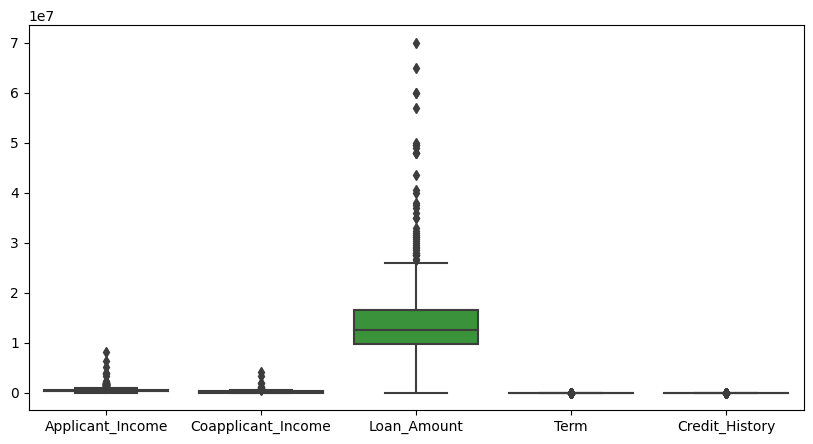

In [50]:
# boxplot to check outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df)

<Axes: xlabel='Loan_Amount', ylabel='Count'>

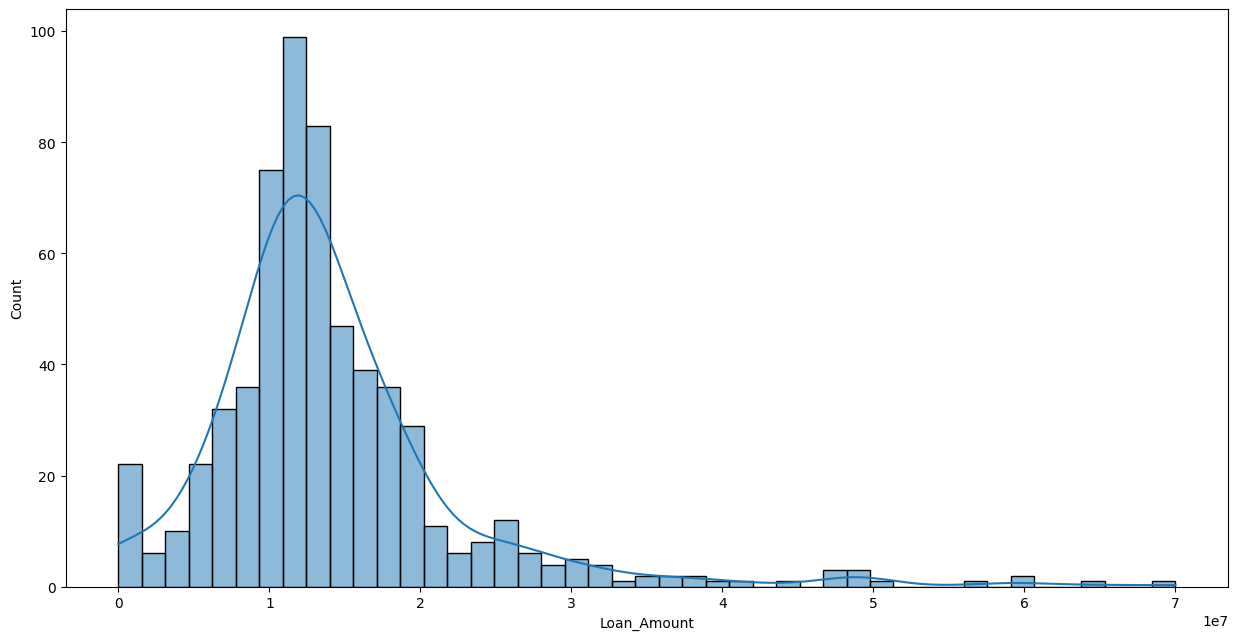

In [51]:
# histogram with kde to check column behaviour
plt.figure(figsize=(15,7.5))
sns.histplot(x='Loan_Amount',data=df,kde=True)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

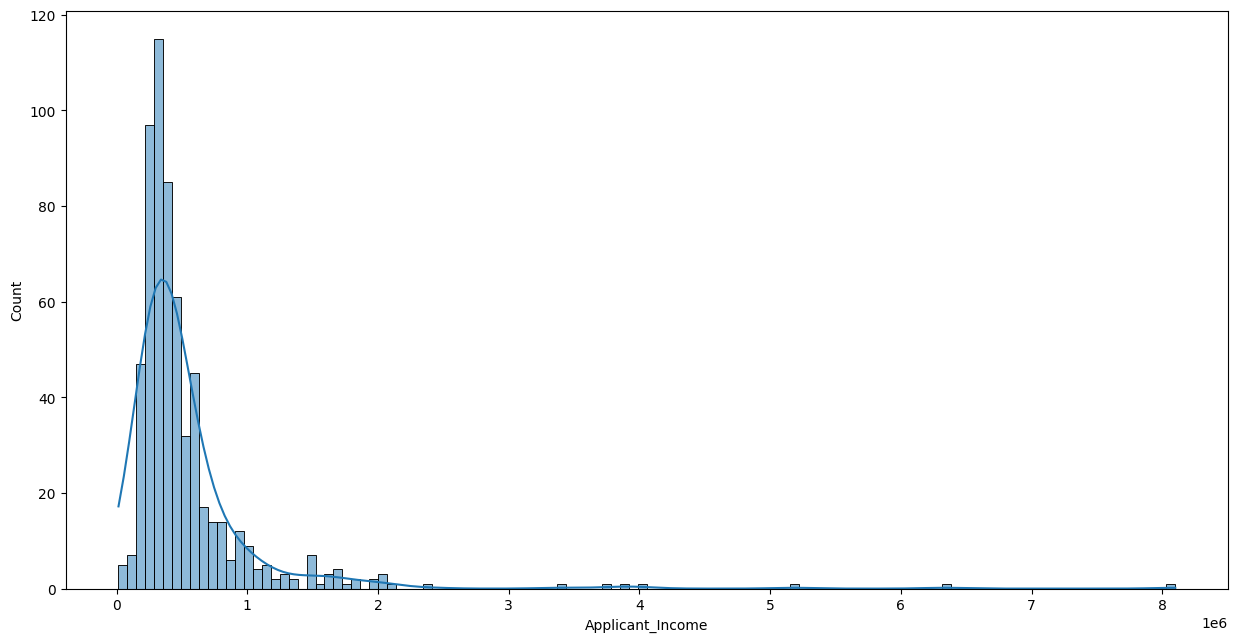

In [53]:
plt.figure(figsize=(15,7.5))
sns.histplot(x='Applicant_Income',data=df,kde=True)

<Axes: xlabel='Loan_Amount', ylabel='Applicant_Income'>

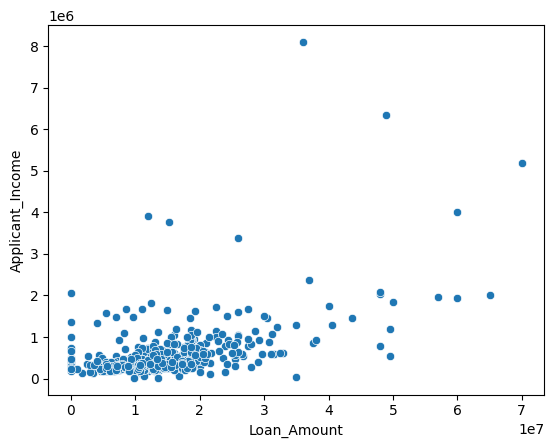

In [54]:
# check relation between two most important features
sns.scatterplot(x='Loan_Amount',y='Applicant_Income',data=df)

In [55]:
# Replacing outliers
# Calculate IQR
Q1 = df['Loan_Amount'].quantile(0.25)
Q3 = df['Loan_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Loan_Amount'] < lower_bound) | (df['Loan_Amount'] > upper_bound)]

# Replace outliers with column mean
column_mean = df['Loan_Amount'].mean()
df.loc[outliers.index, 'Loan_Amount'] = column_mean


In [56]:
# Calculate IQR
Q1 = df['Applicant_Income'].quantile(0.25)
Q3 = df['Applicant_Income'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Applicant_Income'] < lower_bound) | (df['Applicant_Income'] > upper_bound)]

# Replace outliers with column mean
column_mean = df['Applicant_Income'].mean()
df.loc[outliers.index, 'Applicant_Income'] = column_mean


<Axes: xlabel='Loan_Amount', ylabel='Count'>

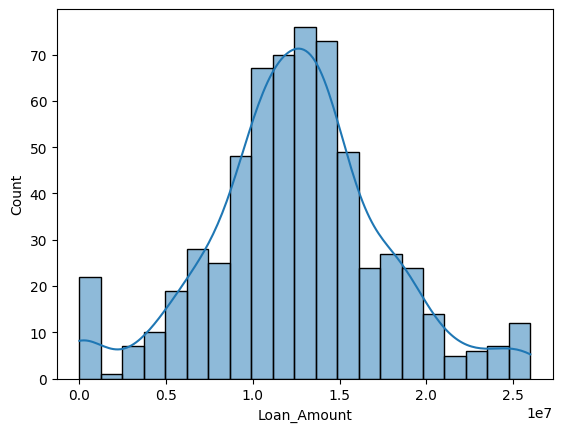

In [57]:
sns.histplot(data=df,x='Loan_Amount',kde=True)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

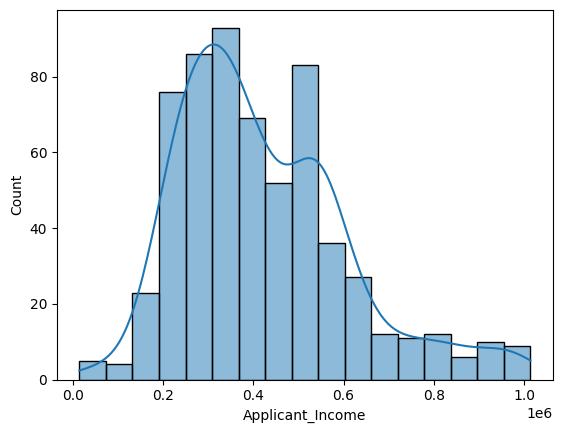

In [58]:
sns.histplot(data=df,x='Applicant_Income',kde=True)

<Axes: >

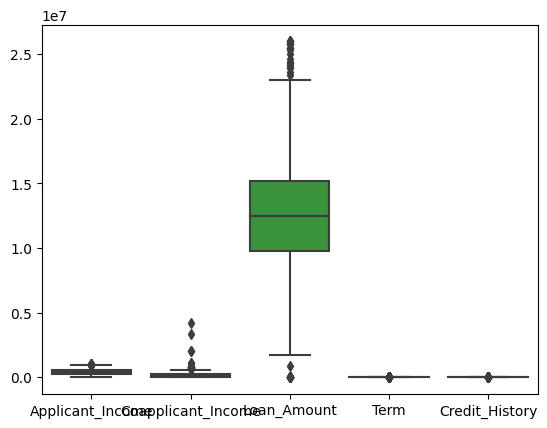

In [59]:
sns.boxplot(data=df)

<Axes: xlabel='Loan_Amount', ylabel='Applicant_Income'>

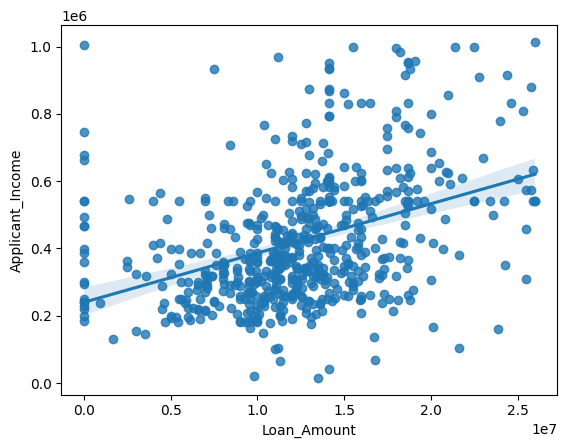

In [60]:
import seaborn as sns
sns.regplot(x='Loan_Amount', y='Applicant_Income', data=df)

In [13]:
df.dropna(inplace=True,how='any')

In [14]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900.0,0.0,15000000.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300.0,150800.0,12800000.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000.0,0.0,6600000.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300.0,235800.0,12000000.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000.0,0.0,14100000.0,360.0,1.0,Urban,Y


In [16]:
# labelencoder function
from sklearn.preprocessing import LabelEncoder

def label_encode_column(df, column_name):
    """
    Label encodes a column in a pandas dataframe.
    
    Parameters:
        df (pandas.DataFrame): the dataframe containing the column to be encoded
        column_name (str): the name of the column to be encoded
        
    Returns:
        pandas.DataFrame: the original dataframe with the encoded column
    """
    encoder = LabelEncoder()
    encoded_column = encoder.fit_transform(df[column_name])
    df[column_name] = encoded_column
    return df

In [17]:
# One hot encoder
from sklearn.preprocessing import OneHotEncoder

def onehot_encode_column(df, column_name):
    """
    One-hot encodes a column in a pandas dataframe.
    
    Parameters:
        df (pandas.DataFrame): the dataframe containing the column to be encoded
        column_name (str): the name of the column to be encoded
        
    Returns:
        pandas.DataFrame: the original dataframe with the encoded column(s)
    """
    # Create the OneHotEncoder object
    encoder = OneHotEncoder(sparse=False, drop='first')
    
    # Reshape the column to a 2D array for the encoder
    column_array = df[column_name].values.reshape(-1, 1)
    
    # Fit and transform the encoder on the column
    encoded_columns = encoder.fit_transform(column_array)
    
    # Get the names of the encoded columns
    unique_values = df[column_name].unique()
    new_column_names = [f"{column_name}_{value}" for value in unique_values[1:]]
    
    # Create a new dataframe with the encoded columns
    encoded_df = pd.DataFrame(encoded_columns, columns=new_column_names, index=df.index)
    
    # Merge the original dataframe with the encoded dataframe
    df = pd.concat([df, encoded_df], axis=1)
    
    # Drop the original column from the dataframe
    df.drop(column_name, axis=1, inplace=True)
    
    # Return the encoded dataframe
    return df


In [18]:
# Using function to encoding of data 
label_encode_column(df,'Gender')
label_encode_column(df,'Married')
label_encode_column(df,'Self_Employed')
label_encode_column(df,'Education')
label_encode_column(df,'Status')
label_encode_column(df,'Area')

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900.0,0.0,15000000.0,360.0,1.0,2,1
1,1,1,1,0,0,458300.0,150800.0,12800000.0,360.0,1.0,0,0
2,1,1,0,0,1,300000.0,0.0,6600000.0,360.0,1.0,2,1
3,1,1,0,1,0,258300.0,235800.0,12000000.0,360.0,1.0,2,1
4,1,0,0,0,0,600000.0,0.0,14100000.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000.0,0.0,7100000.0,360.0,1.0,0,1
610,1,1,3+,0,0,410600.0,0.0,4000000.0,180.0,1.0,0,1
611,1,1,1,0,0,807200.0,24000.0,25300000.0,360.0,1.0,2,1
612,1,1,2,0,0,758300.0,0.0,18700000.0,360.0,1.0,2,1


In [19]:
df['Dependents'] = df['Dependents'].str.replace('+', '')

C:\Users\deepa\AppData\Local\Temp\ipykernel_9848\363258076.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dependents'] = df['Dependents'].str.replace('+', '')


In [20]:
# Chnging datatypes of columns
df[['Coapplicant_Income','Loan_Amount','Term','Credit_History','Dependents']] = df[['Coapplicant_Income','Loan_Amount','Term','Credit_History','Dependents']].astype(int)

In [21]:
df.dtypes

Gender                  int32
Married                 int32
Dependents              int32
Education               int32
Self_Employed           int32
Applicant_Income      float64
Coapplicant_Income      int32
Loan_Amount             int32
Term                    int32
Credit_History          int32
Area                    int32
Status                  int32
dtype: object

<Axes: >

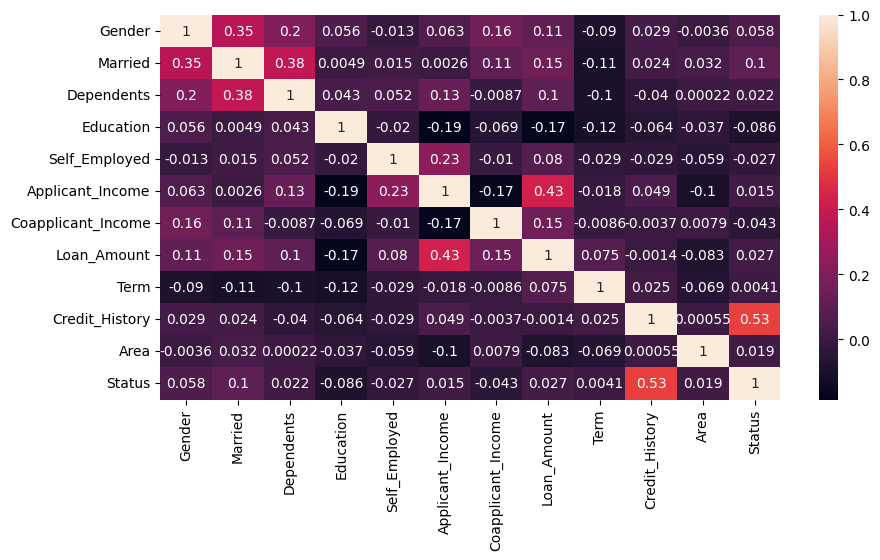

In [22]:
# Checking pearson correlation
plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(),annot=True)

<Axes: >

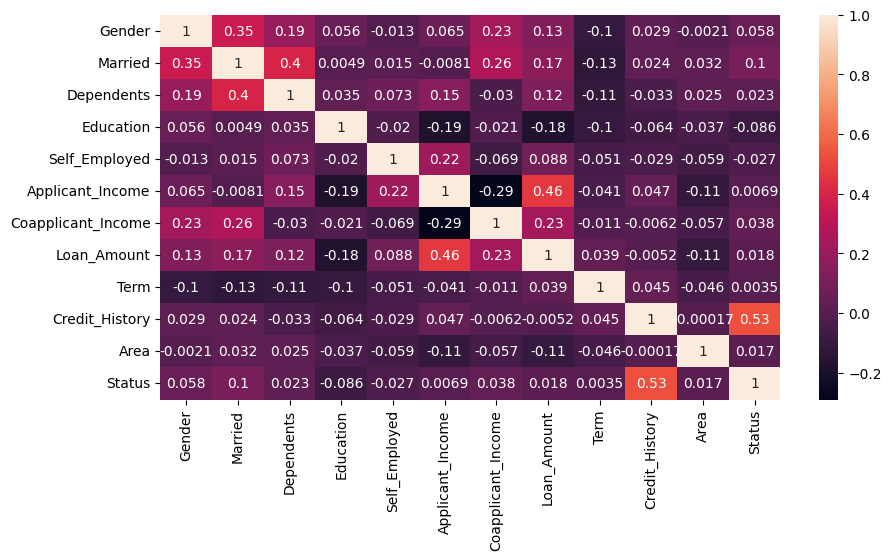

In [23]:
# checking spearman correlation
plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(method='spearman'),annot=True)

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900.0,0,15000000,360,1,2,1
1,1,1,1,0,0,458300.0,150800,12800000,360,1,0,0
2,1,1,0,0,1,300000.0,0,6600000,360,1,2,1
3,1,1,0,1,0,258300.0,235800,12000000,360,1,2,1
4,1,0,0,0,0,600000.0,0,14100000,360,1,2,1


In [25]:
X = df.iloc[:,:-1]
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,1,0,0,0,0,584900.0,0,15000000,360,1,2
1,1,1,1,0,0,458300.0,150800,12800000,360,1,0
2,1,1,0,0,1,300000.0,0,6600000,360,1,2
3,1,1,0,1,0,258300.0,235800,12000000,360,1,2
4,1,0,0,0,0,600000.0,0,14100000,360,1,2


In [26]:
from sklearn.preprocessing import RobustScaler
# create the RobustScaler object and fit it to the data
scaler = RobustScaler().fit(X)

# transform the data using the scaler
X = pd.DataFrame(scaler.transform(X), columns=X.columns)


In [27]:
y = df.iloc[:,-1:]
y.head()

,Status
0,1
1,0
2,1
3,1
4,1


In [28]:
y = y.values.reshape(-1,)

In [29]:
# spliiting data into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
# Logistic regression  
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000).fit(X_train,y_train)

In [31]:
log.score(X_train,y_train)

0.7904191616766467

In [32]:
log.score(X_test,y_test)

0.8303030303030303

In [33]:
pr = log.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(pr,y_test))

              precision    recall  f1-score   support

           0       0.59      0.92      0.72        39
           1       0.97      0.80      0.88       126

    accuracy                           0.83       165
   macro avg       0.78      0.86      0.80       165
weighted avg       0.88      0.83      0.84       165



In [35]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42).fit(X_train,y_train)

In [36]:
dec.score(X_train,y_train)

0.7994011976047904

In [37]:
dec.score(X_test,y_test)

0.8242424242424242

In [38]:
predict = dec.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.59      0.90      0.71        40
           1       0.96      0.80      0.87       125

    accuracy                           0.82       165
   macro avg       0.78      0.85      0.79       165
weighted avg       0.87      0.82      0.83       165



In [40]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=2,max_features=4,max_depth=4,n_jobs=-1, random_state=0).fit(X_train, y_train)

In [41]:
clf.score(X_train,y_train)

0.8023952095808383

In [42]:
clf.score(X_test,y_test)

0.8363636363636363

In [43]:
pred = clf.predict(X_test)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75        46
           1       0.94      0.82      0.88       119

    accuracy                           0.84       165
   macro avg       0.80      0.85      0.81       165
weighted avg       0.86      0.84      0.84       165



In [46]:
# SVM 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# define the parameter grid
param_grid = {'C': [3],
              'gamma': [0.5],
              'kernel': ['linear'],
              'class_weight': [None]}

# create the SVM model
svm = SVC()

# create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# print the best hyperparameters
#print("Best hyperparameters: ", grid_search.best_params_)

# predict the labels for the test data using the best model
y_pred = grid_search.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.59      0.73        61
           1       0.80      0.98      0.88       104

    accuracy                           0.84       165
   macro avg       0.88      0.79      0.81       165
weighted avg       0.86      0.84      0.83       165

